In [1]:
import numpy as np
import random, math, copy
import matplotlib.pyplot as plt
from solver import straddle_solver, lse_solver, p_prob_var_solver, p_straddle_solver
from tester import tester
from utils import sinusoid, zero_mean, squared_exponential_kernel
%matplotlib inline

In [2]:
x, y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
x, y = np.reshape(x, (-1, 1)), np.reshape(y, (-1, 1))
sample_space = list(np.hstack((x, y)))
k = squared_exponential_kernel(math.exp(1), math.exp(-1.5))

In [3]:
tester_tmp = tester(sample_num=50, iter_num=5)

In [4]:
solver = []
solver.append(
    straddle_solver(
        sample_space=sample_space,
        threshold=1,
        sigma=math.exp(-1),
        function=sinusoid,
        kernel=k,
        mean=zero_mean))
solver.append(
    lse_solver(
        sample_space=sample_space,
        threshold=1,
        sigma=math.exp(-1),
        function=sinusoid,
        kernel=k,
        mean=zero_mean,
        epsilon=1e-12))
solver.append(
    p_prob_var_solver(
        sample_space=sample_space,
        threshold=1,
        sigma=math.exp(-1),
        function=sinusoid,
        kernel=k,
        mean=zero_mean,
        epsilon=1e-12,
        beta=0.2,
        dropout=0.0))

labels = ['straddle', 'LSE', 'pv score']
colors = ['r', 'g', 'b']

In [5]:
res = []
for i in range(3):
    tester_tmp.clear()
    tester_tmp.run(solver[i])
    res.append(tester_tmp.get_error_bar_param())

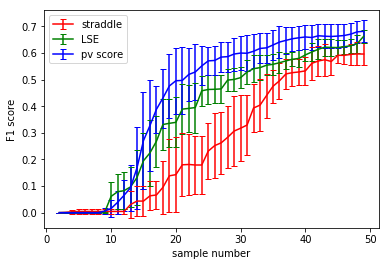

In [9]:
plt.figure()
for i, r in enumerate(res):
    x, t, err = r
    plt.errorbar(x, t, err, label=labels[i], color=colors[i], capsize=3)
    plt.legend()
plt.xlabel('sample number')
plt.ylabel('F1 score')
plt.savefig('compare_f1.png', dpi=600)

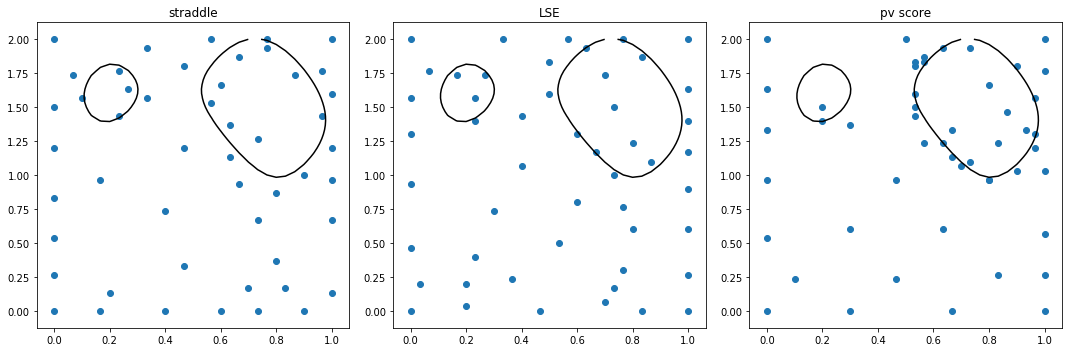

In [8]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)    
    # plot contour
    X,Y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
    Z = np.vectorize(math.sin)(10*X) + np.vectorize(math.cos)(4*Y) - np.vectorize(math.cos)(3*X*Y)
    contour = plt.contour(X,Y,Z,[1],colors='k')
    x = [p[0] for p in solver[i].x_hist]
    y = [p[1] for p in solver[i].x_hist]
    plt.scatter(x, y)
    plt.title(labels[i])
plt.tight_layout()
plt.savefig('compare_location.png', dpi=600)

---

In [ ]:
solver = p_lse_solver(
    sample_space=sample_space,
    threshold=1,
    sigma=math.exp(-1),
    function=sinusoid,
    kernel=k,
    mean=zero_mean,
    epsilon=1e-12,
    dropout=0.0)

In [ ]:
it = []
F1 = []
for i in range(40):
    solver.select_point()
    solver.update()
    if i > 1:
        it.append(i)
        F1.append(solver.get_score(1.96)[1])

In [ ]:
plt.plot(it, F1)

In [ ]:
x = [p[0] for p in solver.x_hist]
y = [p[1] for p in solver.x_hist]
plt.scatter(x, y)

In [ ]:
super_level_set, left_set = solver.get_super_level_set(1.96)
gt_set = solver.get_gt_set()
plt.subplot(1, 2, 1)
x = [p[0] for p in super_level_set]
y = [p[1] for p in super_level_set]
plt.scatter(x, y)
plt.axis([0, 1, 0, 2])
plt.subplot(1, 2, 2)
x = [p[0] for p in gt_set]
y = [p[1] for p in gt_set]
plt.scatter(x, y)
plt.axis([0, 1, 0, 2])

In [ ]:
X,Y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
#写入函数，z是大写
Z = np.vectorize(math.sin)(10*X) + np.vectorize(math.cos)(4*Y) - np.vectorize(math.cos)(3*X*Y)
#设置打开画布大小,长10，宽6
#plt.figure(figsize=(10,6))
#填充颜色，f即filled
contour = plt.contour(X,Y,Z,[1],colors='k')
#等高线上标明z（即高度）的值，字体大小是10，颜色分别是黑色和红色
#plt.clabel(contour,fontsize=10,colors=('k'))
x = [p[0] for p in solver.x_hist]
y = [p[1] for p in solver.x_hist]
plt.scatter(x, y)
plt.show()

In [ ]:
np.vectorize?

In [ ]:
plt.contour(x, y, 1)